# Take Away Coffee Shop Project


## Find Right and Strategic Location to open Coffee Shop


### The target is about of small project to find a suitable and the right location to open a Coffee Shop in Doha-Qatar.
The Coffee Shop have a specificity of take away service.

The prerequisites for it :
    - Accessible to customers.
    - Near by a supermarket.
    - List all the coffee shops in the supermarkets

In [7]:
# Import libraries


In [8]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import pandas as pd
# Set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

from pandas.io.json import json_normalize

import folium # map rendering library

import requests

import numpy as np

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.pyplot import subplots

from sklearn import preprocessing

print('Libraries imported.')

Libraries imported.


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


## Data Source and Acquisition


## Get the Geo Coordinates of the "Doha -Qatar"


In [11]:
address = 'Doha, Qatar'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Doha Qatar {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Doha Qatar 25.2856329, 51.5264162.


In [12]:
string = str(latitude) + ', ' +str(longitude)
address = geolocator.reverse(string, language='en')
address

Location(Old Salata, Al Khail Street, Mushayrib Downtown Doha, Doha, 15054, Qatar, (25.2861024, 51.5258625, 0.0))

### Doha Map


In [14]:
map_doha = folium.Map(location=[latitude, longitude], zoom_start=18)
folium.Marker([latitude, longitude], popup='Doha').add_to(map_doha)
map_doha

### Get the Supermarkets in the Doha City of Qatar around  25KM


In [16]:
radius = 25000
VERSION = '20190630' # Foursquare API version
LIMIT = 200
category_id = ('52f2ab2ebcbc57f1066b8b46') # Supermarket

In [17]:
url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
     '52f2ab2ebcbc57f1066b8b46',
    'EO45XS3TUNCVOX5BC4EEOHVVNRTRJM2QU4OO1DIRB5APMDQ1',
    'KR20IRSJACZF044ZOI1CU5U35WPEVX51EDKGTBIMTASF15V1', 
    '20190630', 25.2861024, 51.5258625,
     25000,
    200)

In [18]:
SM_list = requests.get(url).json()["response"]['groups'][0]['items']
SM_init_df = pd.json_normalize(SM_list)

SM_init_df.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups
0,e-0-52008bdd498e72f2e2c93063-0,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",52008bdd498e72f2e2c93063,MONOPRIX (مونوبري),Twin Palm Tower,Majlis al Taawon,25.317642,51.526913,"[{'label': 'display', 'lat': 25.3176417771189, 'lng': 51.526913097487714}]",3512,75,QA,الدوحة,الدوحة,قطر,"[Twin Palm Tower (Majlis al Taawon), الدوحة 75, قطر]","[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralName': 'Supermarkets', 'shortName': 'Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}]",0,[]
1,e-0-5916fbbea30619669ee16614-1,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",5916fbbea30619669ee16614,Carrefour,NaN,NaN,25.273246,51.499223,"[{'label': 'display', 'lat': 25.27324632602123, 'lng': 51.49922292950948}]",3039,NaN,QA,الدوحة,الدوحة,قطر,"[الدوحة, قطر]","[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralName': 'Supermarkets', 'shortName': 'Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}]",0,[]
2,e-0-5cdfb7a6b3c961002cff11d4-2,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",5cdfb7a6b3c961002cff11d4,Monoprix (مونوبري),NaN,NaN,25.366385,51.550264,"[{'label': 'display', 'lat': 25.366385, 'lng': 51.550264}]",9268,NaN,QA,الدوحة,الدوحة,قطر,"[الدوحة, قطر]","[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralName': 'Supermarkets', 'shortName': 'Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}]",0,[]
3,e-0-4bc194fb4cdfc9b648e19421-3,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",4bc194fb4cdfc9b648e19421,Megamart,"Al Muntazah, Doha, Qatar",NaN,25.274820,51.515861,"[{'label': 'display', 'lat': 25.274820086946253, 'lng': 51.515861167084914}]",1609,NaN,QA,الدوحة,الدوحة,قطر,"[Al Muntazah, Doha, Qatar, الدوحة, قطر]","[{'id': '4bf58dd8d48988d1f6941735', 'name': 'Department Store', 'pluralName': 'Department Stores', 'shortName': 'Department Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/departmentstore_', 'suffix': '.png'}, 'primary': True}]",0,[]
4,e-0-4d14ba44e190721e24a30921-4,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",4d14ba44e190721e24a30921,Carrefour,"Villaggio Mall, P.O. Box 63047",Al Waab St.,25.258412,51.441897,"[{'label': 'display', 'lat': 25.258412049307942, 'lng': 51.441897424595474}]",8996,NaN,QA,الدوحة,الدوحة,قطر,"[Villaggio Mall, P.O. Box 63047 (Al Waab St.), الدوحة, قطر]","[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralName': 'Supermarkets', 'shortName': 'Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}]",0,[]


### Extract Needed Data


In [20]:

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
SM_filtered_df = SM_init_df.loc[:, filtered_columns]

# filter the category for each row
SM_filtered_df['venue_type'] = SM_init_df ['venue.categories'].apply(lambda x: dict(x[0])['name'])

# clean columns
SM_filtered_df.columns = [col.split('.')[-1] for col in SM_filtered_df.columns]

SM_df = SM_filtered_df[SM_filtered_df['venue_type'] == 'Supermarket']
SM_df = SM_df.drop('categories', axis=1)
SM_df.head()

,name,lat,lng,distance,venue_type
0,MONOPRIX (مونوبري),25.317642,51.526913,3512,Supermarket
1,Carrefour,25.273246,51.499223,3039,Supermarket
2,Monoprix (مونوبري),25.366385,51.550264,9268,Supermarket
4,Carrefour,25.258412,51.441897,8996,Supermarket
5,Al Meera (الميرة),25.337399,51.504979,6084,Supermarket


In [21]:
SM_df.shape


(40, 5)

### Renaming


In [23]:

SM_df.rename(columns={'name': 'Supermarket',
                            'distance': 'Distance from Doha Downtown',
                            'venue_type': 'Venue Type'},
                   inplace=True)

SM_df.reset_index(drop=True, inplace=True)

print(SM_df.info())
SM_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Supermarket                  40 non-null     object 
 1   lat                          40 non-null     float64
 2   lng                          40 non-null     float64
 3   Distance from Doha Downtown  40 non-null     int64  
 4   Venue Type                   40 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ KB
None


,Supermarket,lat,lng,Distance from Doha Downtown,Venue Type
0,MONOPRIX (مونوبري),25.317642,51.526913,3512,Supermarket
1,Carrefour,25.273246,51.499223,3039,Supermarket
2,Monoprix (مونوبري),25.366385,51.550264,9268,Supermarket
3,Carrefour,25.258412,51.441897,8996,Supermarket
4,Al Meera (الميرة),25.337399,51.504979,6084,Supermarket


### Visualize the supermarkets list on map


In [25]:
# create map of Doha using latitude and longitude values
map_doha = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, Supermarket in zip(SM_df['lat'],
                         SM_df['lng'],
                          SM_df['Supermarket']):
    label = '{}'.format('Supermarket')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity=0.3,
        parse_html=True
    ).add_to(map_doha)
    
map_doha

### Get the Coffee Shops nearby the Supermarkets in a radius of 200m around each supermarket


In [27]:
def getNearbyCoffee(categoryId, Supermarkets, latitudes, longitudes, radius=200):
    
    print('Finding Coffee shop near to Supermarkets, please wait...\n')
    
    CS_list=[]
    for Supermarket, lat, lng in zip(Supermarkets, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            '4bf58dd8d48988d1e0931735','EO45XS3TUNCVOX5BC4EEOHVVNRTRJM2QU4OO1DIRB5APMDQ1',
    'KR20IRSJACZF044ZOI1CU5U35WPEVX51EDKGTBIMTASF15V1', 
    '20190630',
    25.3228997,
    51.5329934,
    200,100)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby gym
        CS_list.append([(
            Supermarket,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name']
        ) for v in results])

    nearby_CS_df = pd.DataFrame([item for venue_list in CS_list for item in venue_list])
    nearby_CS_df.columns = [
                  'Supermarket',
                  'lat',
                  'lng',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Distance from Supermarket',
                  'Venue Category']
    print('Finished')
    return(nearby_CS_df)

In [28]:

categoryId = '4bf58dd8d48988d1e0931735' # COFFEE SHOP
CS_venues_df = getNearbyCoffee(categoryId, Supermarkets=SM_df['Supermarket'], latitudes=SM_df['lat'], longitudes=SM_df['lng'])

Finding Coffee shop near to Supermarkets, please wait...

Finished


In [29]:
CS_venues_df.head()


,Supermarket,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Supermarket,Venue Category
0,MONOPRIX (مونوبري),25.317642,51.526913,The Coffee Beanery City Centre,25.323609,51.531203,196,Café
1,MONOPRIX (مونوبري),25.317642,51.526913,Caramel - City Center Rotana,25.324214,51.533960,175,Coffee Shop
2,MONOPRIX (مونوبري),25.317642,51.526913,Caramel,25.323934,51.532466,126,Café
3,Carrefour,25.273246,51.499223,The Coffee Beanery City Centre,25.323609,51.531203,196,Café
4,Carrefour,25.273246,51.499223,Caramel - City Center Rotana,25.324214,51.533960,175,Coffee Shop


In [30]:
CS_venues_df.tail()


,Supermarket,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Supermarket,Venue Category
115,Almeera (الميرة),25.373419,51.449171,Caramel - City Center Rotana,25.324214,51.533960,175,Coffee Shop
116,Almeera (الميرة),25.373419,51.449171,Caramel,25.323934,51.532466,126,Café
117,"Sidra, Bu Fesseela Station",25.433548,51.411264,The Coffee Beanery City Centre,25.323609,51.531203,196,Café
118,"Sidra, Bu Fesseela Station",25.433548,51.411264,Caramel - City Center Rotana,25.324214,51.533960,175,Coffee Shop
119,"Sidra, Bu Fesseela Station",25.433548,51.411264,Caramel,25.323934,51.532466,126,Café


In [31]:
CS_venues_df.shape


(120, 8)

## Check and Group the coffee shops by category venue


In [33]:
CS_venues_df.groupby(['Venue Category']).count().head(10)


,Supermarket,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Supermarket
Venue Category,,,,,,,
Café,80,80,80,80,80,80,80
Coffee Shop,40,40,40,40,40,40,40


### Sort the minimum distance of coffee shop to the Supermarket


In [35]:
CS_venues_df.groupby('Venue')['Distance from Supermarket'].min().head()


Venue
Caramel                           126
Caramel - City Center Rotana      175
The Coffee Beanery City Centre    196
Name: Distance from Supermarket, dtype: int64

In [36]:
CS_venues_min_df = pd.merge(CS_venues_df,pd.DataFrame(CS_venues_df.groupby('Venue')['Distance from Supermarket'].min()),on='Venue', how='inner')
CS_venues_min_df.head()

,Supermarket,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Supermarket_x,Venue Category,Distance from Supermarket_y
0,MONOPRIX (مونوبري),25.317642,51.526913,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196
1,Carrefour,25.273246,51.499223,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196
2,Monoprix (مونوبري),25.366385,51.550264,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196
3,Carrefour,25.258412,51.441897,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196
4,Al Meera (الميرة),25.337399,51.504979,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196


In [37]:
CS_venues_min_df.shape


(120, 9)

In [38]:
CS_venues_min_df.tail()


,Supermarket,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Supermarket_x,Venue Category,Distance from Supermarket_y
115,The Hub - The Pearl,25.367945,51.539697,Caramel,25.323934,51.532466,126,Café,126
116,Lagoon Mini Supermarket,25.364603,51.501281,Caramel,25.323934,51.532466,126,Café,126
117,Monop’,25.373098,51.544365,Caramel,25.323934,51.532466,126,Café,126
118,Almeera (الميرة),25.373419,51.449171,Caramel,25.323934,51.532466,126,Café,126
119,"Sidra, Bu Fesseela Station",25.433548,51.411264,Caramel,25.323934,51.532466,126,Café,126


### merge the coffee shos list to the existing supermarkets


In [40]:
CS_venues_min_count_df = pd.merge(CS_venues_min_df,pd.DataFrame(CS_venues_min_df.groupby(['Supermarket']).count())['lat'],on='Supermarket', how='inner')
CS_venues_min_count_df.head()

,Supermarket,lat_x,lng,Venue,Venue Latitude,Venue Longitude,Distance from Supermarket_x,Venue Category,Distance from Supermarket_y,lat_y
0,MONOPRIX (مونوبري),25.317642,51.526913,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196,3
1,MONOPRIX (مونوبري),25.317642,51.526913,Caramel - City Center Rotana,25.324214,51.533960,175,Coffee Shop,175,3
2,MONOPRIX (مونوبري),25.317642,51.526913,Caramel,25.323934,51.532466,126,Café,126,3
3,Carrefour,25.273246,51.499223,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196,18
4,Carrefour,25.258412,51.441897,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196,18


### Dataframe name and columns


In [42]:
CS_df = CS_venues_min_count_df.rename(columns={'lat_x': 'lat', 'Distance from Supermarket_x': 'Distance from Supermarket',
                                                   'Distance from Supermarket_y': 'Min Distance from Supermarket',
                                                   'lat_y': 'Coffees Count'})
CS_df.head()

,Supermarket,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Supermarket,Venue Category,Min Distance from Supermarket,Coffees Count
0,MONOPRIX (مونوبري),25.317642,51.526913,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196,3
1,MONOPRIX (مونوبري),25.317642,51.526913,Caramel - City Center Rotana,25.324214,51.533960,175,Coffee Shop,175,3
2,MONOPRIX (مونوبري),25.317642,51.526913,Caramel,25.323934,51.532466,126,Café,126,3
3,Carrefour,25.273246,51.499223,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196,18
4,Carrefour,25.258412,51.441897,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196,18


In [43]:
CS_df.tail()


,Supermarket,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Supermarket,Venue Category,Min Distance from Supermarket,Coffees Count
115,Monop’,25.373098,51.544365,Caramel - City Center Rotana,25.324214,51.533960,175,Coffee Shop,175,3
116,Monop’,25.373098,51.544365,Caramel,25.323934,51.532466,126,Café,126,3
117,"Sidra, Bu Fesseela Station",25.433548,51.411264,The Coffee Beanery City Centre,25.323609,51.531203,196,Café,196,3
118,"Sidra, Bu Fesseela Station",25.433548,51.411264,Caramel - City Center Rotana,25.324214,51.533960,175,Coffee Shop,175,3
119,"Sidra, Bu Fesseela Station",25.433548,51.411264,Caramel,25.323934,51.532466,126,Café,126,3


### Reshape the Dataframe


In [45]:

CS_df = CS_df[['Supermarket', 'lat', 'lng', 'Min Distance from Supermarket', 'Coffees Count']].drop_duplicates()
CS_df.head()

,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count
0,MONOPRIX (مونوبري),25.317642,51.526913,196,3
1,MONOPRIX (مونوبري),25.317642,51.526913,175,3
2,MONOPRIX (مونوبري),25.317642,51.526913,126,3
3,Carrefour,25.273246,51.499223,196,18
4,Carrefour,25.258412,51.441897,196,18


In [46]:
CS_df.tail()


,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count
115,Monop’,25.373098,51.544365,175,3
116,Monop’,25.373098,51.544365,126,3
117,"Sidra, Bu Fesseela Station",25.433548,51.411264,196,3
118,"Sidra, Bu Fesseela Station",25.433548,51.411264,175,3
119,"Sidra, Bu Fesseela Station",25.433548,51.411264,126,3


In [47]:
CS_df.shape


(120, 5)

In [48]:
CS_df.shape


(120, 5)

In [49]:
CS_coffees_grouped_df = CS_df.copy()


In [50]:
CS_coffees_grouped_df.shape


(120, 5)

In [51]:
CS_coffees_grouped_df.head()


,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count
0,MONOPRIX (مونوبري),25.317642,51.526913,196,3
1,MONOPRIX (مونوبري),25.317642,51.526913,175,3
2,MONOPRIX (مونوبري),25.317642,51.526913,126,3
3,Carrefour,25.273246,51.499223,196,18
4,Carrefour,25.258412,51.441897,196,18


In [52]:
CS_coffees_grouped_df.tail()


,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count
115,Monop’,25.373098,51.544365,175,3
116,Monop’,25.373098,51.544365,126,3
117,"Sidra, Bu Fesseela Station",25.433548,51.411264,196,3
118,"Sidra, Bu Fesseela Station",25.433548,51.411264,175,3
119,"Sidra, Bu Fesseela Station",25.433548,51.411264,126,3


## Normalize and Standardize the data


In [54]:
print('All Supermarket mean distance from any Coffee: ', CS_coffees_grouped_df['Min Distance from Supermarket'].mean())
print('All Supermarket maximum distance from any Coffee: ',CS_coffees_grouped_df['Min Distance from Supermarket'].max())
print('All Supermarket minimum distance from any Coffee: ', CS_coffees_grouped_df['Min Distance from Supermarket'].min())
print('All Supermarket mean of number of existing Coffee: ', CS_coffees_grouped_df['Coffees Count'].mean())
print('All Supermarket maximum number of existing Coffee: ', CS_coffees_grouped_df['Coffees Count'].max())
print('All Supermarket minimum number of existing Coffee: ', CS_coffees_grouped_df['Coffees Count'].min())

All Supermarket mean distance from any Coffee:  165.66666666666666
All Supermarket maximum distance from any Coffee:  196
All Supermarket minimum distance from any Coffee:  126
All Supermarket mean of number of existing Coffee:  5.7
All Supermarket maximum number of existing Coffee:  18
All Supermarket minimum number of existing Coffee:  3


In [55]:
CS_coffees_grouped_df['Norm Min Distance from Supermarket'] = (CS_coffees_grouped_df['Min Distance from Supermarket']- CS_coffees_grouped_df['Min Distance from Supermarket'].mean()) / \
                                                             (CS_coffees_grouped_df['Min Distance from Supermarket'].max() - CS_coffees_grouped_df['Min Distance from Supermarket'].min())
CS_coffees_grouped_df['Norm Coffees Count'] = (CS_coffees_grouped_df['Coffees Count'] - CS_coffees_grouped_df['Coffees Count'].mean()) / \
                                             (CS_coffees_grouped_df['Coffees Count'].max() - CS_coffees_grouped_df['Coffees Count'].min())

In [56]:
CS_coffees_grouped_df.tail()


,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count,Norm Min Distance from Supermarket,Norm Coffees Count
115,Monop’,25.373098,51.544365,175,3,0.133333,-0.18
116,Monop’,25.373098,51.544365,126,3,-0.566667,-0.18
117,"Sidra, Bu Fesseela Station",25.433548,51.411264,196,3,0.433333,-0.18
118,"Sidra, Bu Fesseela Station",25.433548,51.411264,175,3,0.133333,-0.18
119,"Sidra, Bu Fesseela Station",25.433548,51.411264,126,3,-0.566667,-0.18


In [57]:
CS_coffees_grouped_df.head()

,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count,Norm Min Distance from Supermarket,Norm Coffees Count
0,MONOPRIX (مونوبري),25.317642,51.526913,196,3,0.433333,-0.18
1,MONOPRIX (مونوبري),25.317642,51.526913,175,3,0.133333,-0.18
2,MONOPRIX (مونوبري),25.317642,51.526913,126,3,-0.566667,-0.18
3,Carrefour,25.273246,51.499223,196,18,0.433333,0.82
4,Carrefour,25.258412,51.441897,196,18,0.433333,0.82


## CLUSTERING the Supermarkets


In [59]:

coffees_clustering_df =CS_coffees_grouped_df.drop(['Supermarket', 'lat', 'lng','Min Distance from Supermarket','Coffees Count'], 1)

In [60]:
CS_coffees_grouped_df.reset_index(drop=True, inplace=True)


In [61]:
coffees_clustering_df.head()


,Norm Min Distance from Supermarket,Norm Coffees Count
0,0.433333,-0.18
1,0.133333,-0.18
2,-0.566667,-0.18
3,0.433333,0.82
4,0.433333,0.82


In [62]:
coffees_clustering_df.tail()


,Norm Min Distance from Supermarket,Norm Coffees Count
115,0.133333,-0.18
116,-0.566667,-0.18
117,0.433333,-0.18
118,0.133333,-0.18
119,-0.566667,-0.18


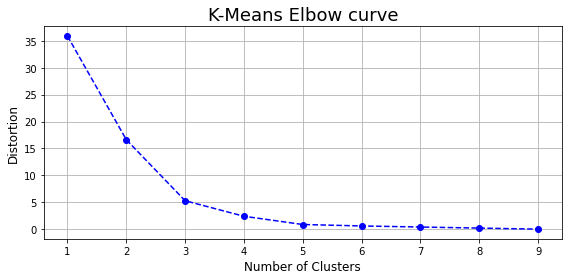

In [63]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(1, 10):
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=0, n_init = 12, max_iter=300, tol=0.00001)
    kmeans.fit(coffees_clustering_df)
    distorsions.append(kmeans.inertia_)

fig, ax = subplots(figsize=(8, 4))
ax.plot(range(1, 10), distorsions, '--bo')
ax.set_xlabel('Number of Clusters', fontsize=12)
ax.set_ylabel('Distortion', fontsize=12)
plt.grid(True)
plt.title('K-Means Elbow curve', fontsize='18')
plt.tight_layout()
plt.show()


## Clustering the Supermarkets on 2 Clusters


In [65]:
kmeans = KMeans(init="k-means++", n_clusters=2, random_state=0, n_init = 12, max_iter=300, tol=0.0001)
kmeans.fit(coffees_clustering_df)

kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## Coffee shops dataframe with cluster results


In [71]:
CS_coffees_grouped_df.insert(0, 'Cluster Label', kmeans.labels_)


In [72]:
CS_coffees_grouped_df.head(10)


,Cluster Label,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count,Norm Min Distance from Supermarket,Norm Coffees Count
0,1,MONOPRIX (مونوبري),25.317642,51.526913,196,3,0.433333,-0.18
1,1,MONOPRIX (مونوبري),25.317642,51.526913,175,3,0.133333,-0.18
2,0,MONOPRIX (مونوبري),25.317642,51.526913,126,3,-0.566667,-0.18
3,1,Carrefour,25.273246,51.499223,196,18,0.433333,0.82
4,1,Carrefour,25.258412,51.441897,196,18,0.433333,0.82
5,1,Carrefour,25.334287,51.467635,196,18,0.433333,0.82
6,1,Carrefour,25.257631,51.487681,196,18,0.433333,0.82
7,1,Carrefour,25.247412,51.489123,196,18,0.433333,0.82
8,1,Carrefour,25.241691,51.484480,196,18,0.433333,0.82
9,1,Carrefour,25.273246,51.499223,175,18,0.133333,0.82


In [73]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CS_coffees_grouped_df['lat'], CS_coffees_grouped_df['lng'], 
                                  CS_coffees_grouped_df['Supermarket'], CS_coffees_grouped_df['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        #color=cluster_colors[cluster],
        color=rainbow[int(cluster-1)],
        fill=False,
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [74]:
CS_coffees_grouped_df.groupby('Cluster Label').head()


,Cluster Label,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count,Norm Min Distance from Supermarket,Norm Coffees Count
0,1,MONOPRIX (مونوبري),25.317642,51.526913,196,3,0.433333,-0.18
1,1,MONOPRIX (مونوبري),25.317642,51.526913,175,3,0.133333,-0.18
2,0,MONOPRIX (مونوبري),25.317642,51.526913,126,3,-0.566667,-0.18
3,1,Carrefour,25.273246,51.499223,196,18,0.433333,0.82
4,1,Carrefour,25.258412,51.441897,196,18,0.433333,0.82
5,1,Carrefour,25.334287,51.467635,196,18,0.433333,0.82
15,0,Carrefour,25.273246,51.499223,126,18,-0.566667,0.82
16,0,Carrefour,25.258412,51.441897,126,18,-0.566667,0.82
17,0,Carrefour,25.334287,51.467635,126,18,-0.566667,0.82
18,0,Carrefour,25.257631,51.487681,126,18,-0.566667,0.82


In [75]:
CS_coffees_grouped_df.loc[CS_coffees_grouped_df['Cluster Label'] == 0]


,Cluster Label,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count,Norm Min Distance from Supermarket,Norm Coffees Count
2,0,MONOPRIX (مونوبري),25.317642,51.526913,126,3,-0.566667,-0.18
15,0,Carrefour,25.273246,51.499223,126,18,-0.566667,0.82
16,0,Carrefour,25.258412,51.441897,126,18,-0.566667,0.82
17,0,Carrefour,25.334287,51.467635,126,18,-0.566667,0.82
18,0,Carrefour,25.257631,51.487681,126,18,-0.566667,0.82
19,0,Carrefour,25.247412,51.489123,126,18,-0.566667,0.82
20,0,Carrefour,25.241691,51.484480,126,18,-0.566667,0.82
23,0,Monoprix (مونوبري),25.366385,51.550264,126,3,-0.566667,-0.18
28,0,Al Meera (الميرة),25.337399,51.504979,126,6,-0.566667,0.02
29,0,Al Meera (الميرة),25.331485,51.428092,126,6,-0.566667,0.02


In [76]:
CS_coffees_grouped_df.loc[CS_coffees_grouped_df['Cluster Label'] == 1]


,Cluster Label,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count,Norm Min Distance from Supermarket,Norm Coffees Count
0,1,MONOPRIX (مونوبري),25.317642,51.526913,196,3,0.433333,-0.18
1,1,MONOPRIX (مونوبري),25.317642,51.526913,175,3,0.133333,-0.18
3,1,Carrefour,25.273246,51.499223,196,18,0.433333,0.82
4,1,Carrefour,25.258412,51.441897,196,18,0.433333,0.82
5,1,Carrefour,25.334287,51.467635,196,18,0.433333,0.82
6,1,Carrefour,25.257631,51.487681,196,18,0.433333,0.82
7,1,Carrefour,25.247412,51.489123,196,18,0.433333,0.82
8,1,Carrefour,25.241691,51.484480,196,18,0.433333,0.82
9,1,Carrefour,25.273246,51.499223,175,18,0.133333,0.82
10,1,Carrefour,25.258412,51.441897,175,18,0.133333,0.82


In [77]:
CS_coffees_grouped_df.loc[CS_coffees_grouped_df['Cluster Label'] == 2]


,Cluster Label,Supermarket,lat,lng,Min Distance from Supermarket,Coffees Count,Norm Min Distance from Supermarket,Norm Coffees Count


## Discussion & Conclusion


#### The above results itis a good point for running our business and open new Coffee Shop with Take away services.